In [1]:
import pandas as pd

In [62]:
data = pd.read_csv('data/1410020101-noSymbol.csv',header=None,engine='python', skiprows=5,skipfooter=21)

In [63]:
data = data.drop([1])


In [64]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,North American Industry Classification System ...,June 2019,July 2019,August 2019,September 2019,October 2019,November 2019,December 2019,January 2020,February 2020,March 2020,April 2020,May 2020,June 2020
2,Industrial aggregate including unclassified bu...,"17,268,127","17,063,598","16,880,063","17,194,039","17,230,513","17,207,098","17,230,980","16,792,802","16,757,484","15,828,844","14,044,320","13,773,684","14,689,243"
3,Industrial aggregate excluding unclassified bu...,"16,957,344","16,749,357","16,558,361","16,883,924","16,915,542","16,898,817","16,916,185","16,477,363","16,449,918","15,538,499","13,793,669","13,539,625","14,432,303"
4,Goods producing industries 8,"3,073,670","3,092,368","3,095,380","3,083,282","3,060,314","3,023,667","2,969,948","2,838,126","2,852,630","2,653,933","2,382,683","2,496,445","2,724,433"
5,"Forestry, logging and support 9","43,805","44,917","43,145","40,664","39,104","37,486","36,332","33,266","33,022","32,176","27,189","29,329","37,368"


In [65]:
data = data.transpose()
n_header = data.iloc[0] 
data = data[1:]
data.columns = n_header

In [66]:
data.iloc[:,0] = pd.to_datetime(data.iloc[:,0]) # this to_datetim is smart, let it do what it can first before trying to enforce a certain format

In [67]:
#data.set_index('North American Industry Classification System (NAICS)4', inplace=True)

In [68]:
data = data.replace(',','', regex=True) # removing the commas from all columns at once
data 

,North American Industry Classification System (NAICS)4,Industrial aggregate including unclassified businesses 6 7,Industrial aggregate excluding unclassified businesses 6 7,Goods producing industries 8,"Forestry, logging and support 9","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Service producing industries 10,...,"Professional, scientific and technical services",Management of companies and enterprises,"Administrative and support, waste management and remediation services",Educational services,Health care and social assistance,"Arts, entertainment and recreation",Accommodation and food services,Other services (except public administration),Public administration,Unclassified businesses 7
1,2019-06-01,17268127,16957344,3073670,43805,201653,128902,1087014,1612296,13883675,...,980649,112681,843150,1393108,2039173,338884,1380878,565703,1183612,310782
2,2019-07-01,17063598,16749357,3092368,44917,204459,130055,1096566,1616370,13656989,...,986332,110331,851997,1097315,2051456,357258,1404537,568653,1193954,314241
3,2019-08-01,16880063,16558361,3095380,43145,205423,128970,1110301,1607540,13462981,...,987412,110082,853398,950933,2049574,349650,1397348,562814,1183693,321703
4,2019-09-01,17194039,16883924,3083282,40664,204666,127277,1116798,1593877,13800643,...,984220,110836,857406,1319841,2051050,335493,1393370,563052,1158841,310115
5,2019-10-01,17230513,16915542,3060314,39104,202127,128109,1108404,1582570,13855228,...,985905,110484,857803,1445338,2046397,316852,1360207,560464,1143651,314971
6,2019-11-01,17207098,16898817,3023667,37486,199968,127743,1086916,1571554,13875151,...,988956,111613,853556,1473966,2053793,293919,1333759,559817,1142802,308281
7,2019-12-01,17230980,16916185,2969948,36332,200894,127925,1038021,1566776,13946237,...,998022,113498,838939,1472271,2069007,291275,1335964,560511,1138872,314795
8,2020-01-01,16792802,16477363,2838126,33266,198115,127272,945049,1534424,13639237,...,983486,112208,800565,1408323,2056591,286901,1301420,544182,1132871,315439
9,2020-02-01,16757484,16449918,2852630,33022,198053,125872,961719,1533965,13597288,...,983236,114341,796399,1469437,2046515,287804,1283677,541159,1136346,307566
10,2020-03-01,15828844,15538499,2653933,32176,193571,124555,885401,1418230,12884566,...,952297,110641,753378,1452556,1987700,260446,1076331,490059,1133173,290345


In [69]:
cols = data.columns.drop('North American Industry Classification System (NAICS)4')
df = data.copy()
df[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
df['date'] = data['North American Industry Classification System (NAICS)4']

In [75]:
df = df.set_index('date')

In [77]:
df

,North American Industry Classification System (NAICS)4,Industrial aggregate including unclassified businesses 6 7,Industrial aggregate excluding unclassified businesses 6 7,Goods producing industries 8,"Forestry, logging and support 9","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Service producing industries 10,...,"Professional, scientific and technical services",Management of companies and enterprises,"Administrative and support, waste management and remediation services",Educational services,Health care and social assistance,"Arts, entertainment and recreation",Accommodation and food services,Other services (except public administration),Public administration,Unclassified businesses 7
date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,2019-06-01,17268127,16957344,3073670,43805,201653,128902,1087014,1612296,13883675,...,980649,112681,843150,1393108,2039173,338884,1380878,565703,1183612,310782
2019-07-01,2019-07-01,17063598,16749357,3092368,44917,204459,130055,1096566,1616370,13656989,...,986332,110331,851997,1097315,2051456,357258,1404537,568653,1193954,314241
2019-08-01,2019-08-01,16880063,16558361,3095380,43145,205423,128970,1110301,1607540,13462981,...,987412,110082,853398,950933,2049574,349650,1397348,562814,1183693,321703
2019-09-01,2019-09-01,17194039,16883924,3083282,40664,204666,127277,1116798,1593877,13800643,...,984220,110836,857406,1319841,2051050,335493,1393370,563052,1158841,310115
2019-10-01,2019-10-01,17230513,16915542,3060314,39104,202127,128109,1108404,1582570,13855228,...,985905,110484,857803,1445338,2046397,316852,1360207,560464,1143651,314971
2019-11-01,2019-11-01,17207098,16898817,3023667,37486,199968,127743,1086916,1571554,13875151,...,988956,111613,853556,1473966,2053793,293919,1333759,559817,1142802,308281
2019-12-01,2019-12-01,17230980,16916185,2969948,36332,200894,127925,1038021,1566776,13946237,...,998022,113498,838939,1472271,2069007,291275,1335964,560511,1138872,314795
2020-01-01,2020-01-01,16792802,16477363,2838126,33266,198115,127272,945049,1534424,13639237,...,983486,112208,800565,1408323,2056591,286901,1301420,544182,1132871,315439
2020-02-01,2020-02-01,16757484,16449918,2852630,33022,198053,125872,961719,1533965,13597288,...,983236,114341,796399,1469437,2046515,287804,1283677,541159,1136346,307566


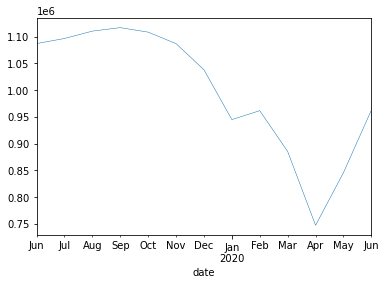

In [78]:
df['Construction'].plot(linewidth=0.5);


In [79]:
df.columns

Index(['North American Industry Classification System (NAICS)4',
       'Industrial aggregate including unclassified businesses 6 7',
       'Industrial aggregate excluding unclassified businesses 6 7',
       'Goods producing industries 8', 'Forestry, logging and support 9',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Service producing industries 10',
       'Trade 11', 'Transportation and warehousing',
       'Information and cultural industries', 'Finance and insurance',
       'Real estate and rental and leasing',
       'Professional, scientific and technical services',
       'Management of companies and enterprises',
       'Administrative and support, waste management and remediation services',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment and recreation', 'Accommodation and food services',
       'Other services (except public administration)',
       'Public adm

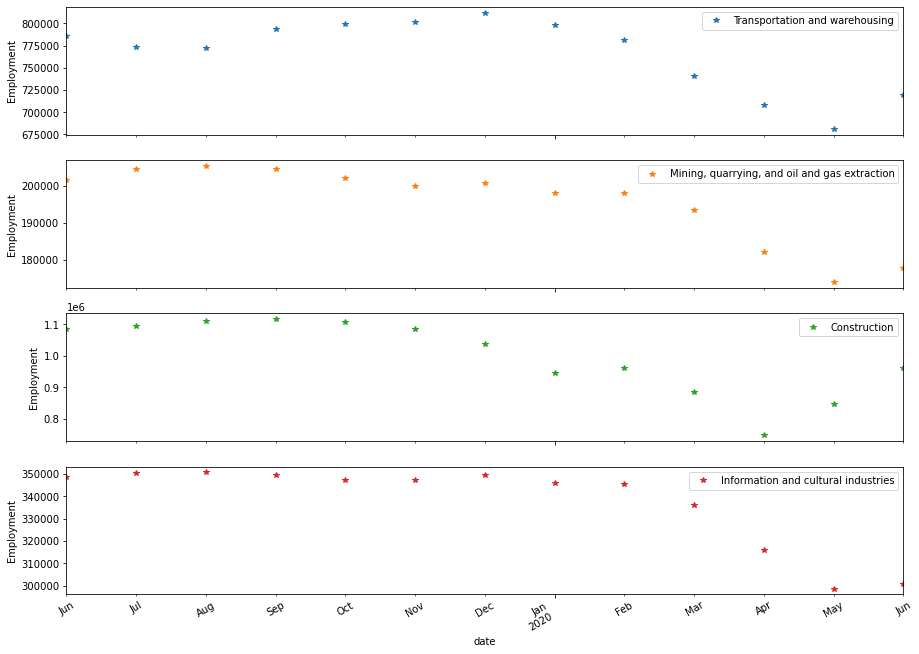

In [86]:
cols_plot = ['Transportation and warehousing', 'Mining, quarrying, and oil and gas extraction', 'Construction','Information and cultural industries']
axes = df[cols_plot].plot(marker='*', linestyle='None', figsize=(15, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('Employment')